# 1. Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [225]:
#df = pd.read_csv('sleep_review.csv')
df = pd.read_excel('indigestion_reviews.xlsx',sheet_name='sheet3')
df.head() 


,link,total_reviews,total_reviews_url,reviewer_name,reviewer_url,reviewer_rate,reviewer_rate_url,reviewer_theme,reviewer_theme_url,reviewer_content,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,http://www.amazon.com/dp/B003OB0H6O,623 customer reviews,https://www.amazon.com/Maruchan-Instant-Lunch-...,MrBob,https://www.amazon.com/gp/profile/amzn1.accoun...,2.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R9B...,Something was definitely wrong.,https://www.amazon.com/gp/customer-reviews/R9B...,Iüm always a bit sorry when I have to give a p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.amazon.com/dp/B003OB0H6O,623 customer reviews,https://www.amazon.com/Maruchan-Instant-Lunch-...,Mr Review,https://www.amazon.com/gp/profile/amzn1.accoun...,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/RF6...,Cockroach,https://www.amazon.com/gp/customer-reviews/RF6...,I found cockroach inside the corn. I am never ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.amazon.com/dp/B003OB0H6O,623 customer reviews,https://www.amazon.com/Maruchan-Instant-Lunch-...,mxh,https://www.amazon.com/gp/profile/amzn1.accoun...,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R1V...,Might be spicy or not.,https://www.amazon.com/gp/customer-reviews/R1V...,The price is worth it if you don't have a near...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.amazon.com/dp/B003OB0H6O,623 customer reviews,https://www.amazon.com/Maruchan-Instant-Lunch-...,Angie,https://www.amazon.com/gp/profile/amzn1.accoun...,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R2X...,Love the flavor and convenience,https://www.amazon.com/gp/customer-reviews/R2X...,These are perfect for me for work. The conveni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.amazon.com/dp/B003OB0H6O,623 customer reviews,https://www.amazon.com/Maruchan-Instant-Lunch-...,T. Alexander,https://www.amazon.com/gp/profile/amzn1.accoun...,1.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R2R...,NOT Maruchan Instant Lunch,https://www.amazon.com/gp/customer-reviews/R2R...,I ordered this because I used to buy these at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape # 6042 rows

(6042, 19)

In [226]:
df = df[['link','reviewer_name','reviewer_rate','reviewer_content' ]]
df = df.dropna()
df.head()

,link,reviewer_name,reviewer_rate,reviewer_content
0,http://www.amazon.com/dp/B003OB0H6O,MrBob,2.0 out of 5 stars,Iüm always a bit sorry when I have to give a p...
1,http://www.amazon.com/dp/B003OB0H6O,Mr Review,1.0 out of 5 stars,I found cockroach inside the corn. I am never ...
2,http://www.amazon.com/dp/B003OB0H6O,mxh,5.0 out of 5 stars,The price is worth it if you don't have a near...
3,http://www.amazon.com/dp/B003OB0H6O,Angie,5.0 out of 5 stars,These are perfect for me for work. The conveni...
4,http://www.amazon.com/dp/B003OB0H6O,T. Alexander,1.0 out of 5 stars,I ordered this because I used to buy these at ...


In [227]:
# extract product ID
import re
l=[]
for i in df.index:
    l2=re.search(r"[A-Z0-9_]+",df['link'][i])
    p=l2.string[l2.start():l2.end()]
    l.append(p)
    print(l)
df['link'] =l

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [228]:
#df.rename(columns={"link": "productId"})
df.head()
df['link'].head()

0    B003OB0H6O
1    B003OB0H6O
2    B003OB0H6O
3    B003OB0H6O
4    B003OB0H6O
Name: link, dtype: object

In [229]:
df = df.loc[~pd.isnull(df['reviewer_rate'])]
df = df.loc[~pd.isnull(df['reviewer_content'])]
 
#df = df.loc[~(df['reviewer_rate'] == 'https://www.amazon.com/gp/customer-reviews/R2FP91V1JSN4QJ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B001EQ4CT4')]
#df.index[df['reviewer_rate'] == 'https://www.amazon.com/gp/customer-reviews/R2FP91V1JSN4QJ/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B001EQ4CT4'].tolist()
#df.loc[(df['link'] == 'B001EO5U3I')] # error  6008
#df.drop(6008, inplace=True)
#df.loc[(df['link'] == 'B001EO5U3I')] 
#df.loc[(df['link'] == 'B001EQ4CT4')]
#df.drop(1139, inplace=True) 


In [14]:
df.shape

(5814, 4)

In [13]:
df.head() 

,link,reviewer_name,reviewer_rate,reviewer_content
0,B003OB0H6O,MrBob,2.0 out of 5 stars,Iüm always a bit sorry when I have to give a p...
1,B003OB0H6O,Mr Review,1.0 out of 5 stars,I found cockroach inside the corn. I am never ...
2,B003OB0H6O,mxh,5.0 out of 5 stars,The price is worth it if you don't have a near...
3,B003OB0H6O,Angie,5.0 out of 5 stars,These are perfect for me for work. The conveni...
4,B003OB0H6O,T. Alexander,1.0 out of 5 stars,I ordered this because I used to buy these at ...


## 1.1 Extract rate from reviewer_rate

In [230]:
def convert(rate):
    return int(float(rate.split()[0]))

In [231]:
df['reviewer_rate']=df['reviewer_rate'].apply(convert)

In [19]:
df.head()

,link,reviewer_name,reviewer_rate,reviewer_content
0,B003OB0H6O,MrBob,2,Iüm always a bit sorry when I have to give a p...
1,B003OB0H6O,Mr Review,1,I found cockroach inside the corn. I am never ...
2,B003OB0H6O,mxh,5,The price is worth it if you don't have a near...
3,B003OB0H6O,Angie,5,These are perfect for me for work. The conveni...
4,B003OB0H6O,T. Alexander,1,I ordered this because I used to buy these at ...


## 1.2  Product based collaborative filtering

In [20]:
#compute the count and mean value as group by the products
count = df.groupby("link", as_index=False).count() # number of record for each link (ID)
mean = df.groupby("link", as_index=False).mean()  # mean reviewer_rate for each link (ID) 


In [23]:
print(count.head())
print(mean.head())

         link  reviewer_name  reviewer_rate  reviewer_content
0  B0000CCZYY              8              8                 8
1  B0000DID5Q              7              7                 7
2  B0000GHNT0              8              8                 8
3  B0000V8IOE              5              5                 5
4  B00014DAHU             16             16                16
         link  reviewer_rate
0  B0000CCZYY       4.750000
1  B0000DID5Q       4.714286
2  B0000GHNT0       5.000000
3  B0000V8IOE       3.800000
4  B00014DAHU       4.125000


In [29]:
#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=['link'], indicator=True)
df1.head(5)

,link,reviewer_name_x,reviewer_rate_x,reviewer_content_x,reviewer_name_y,reviewer_rate_y,reviewer_content_y,_merge
0,B003OB0H6O,MrBob,2,Iüm always a bit sorry when I have to give a p...,6,6,6,both
1,B003OB0H6O,Mr Review,1,I found cockroach inside the corn. I am never ...,6,6,6,both
2,B003OB0H6O,mxh,5,The price is worth it if you don't have a near...,6,6,6,both
3,B003OB0H6O,Angie,5,These are perfect for me for work. The conveni...,6,6,6,both
4,B003OB0H6O,T. Alexander,1,I ordered this because I used to buy these at ...,6,6,6,both


In [34]:
#rename column
df1["ProductId"]=df1["link"]
df1["Count"]=df1["reviewer_name_y"]
df1["Score"] = df1["reviewer_rate_x"]
df1["Summary"] = df1["reviewer_content_x"]
df1.head(5)

,link,reviewer_name_x,reviewer_rate_x,reviewer_content_x,reviewer_name_y,reviewer_rate_y,reviewer_content_y,_merge,Score,Summary,ProductId,Count
0,B003OB0H6O,MrBob,2,Iüm always a bit sorry when I have to give a p...,6,6,6,both,2,Iüm always a bit sorry when I have to give a p...,B003OB0H6O,6
1,B003OB0H6O,Mr Review,1,I found cockroach inside the corn. I am never ...,6,6,6,both,1,I found cockroach inside the corn. I am never ...,B003OB0H6O,6
2,B003OB0H6O,mxh,5,The price is worth it if you don't have a near...,6,6,6,both,5,The price is worth it if you don't have a near...,B003OB0H6O,6
3,B003OB0H6O,Angie,5,These are perfect for me for work. The conveni...,6,6,6,both,5,These are perfect for me for work. The conveni...,B003OB0H6O,6
4,B003OB0H6O,T. Alexander,1,I ordered this because I used to buy these at ...,6,6,6,both,1,I ordered this because I used to buy these at ...,B003OB0H6O,6


In [37]:
#Create New datafram with selected variables
df1 = df1[['ProductId','Summary','Score',"Count"]]
df1.head(10)

,ProductId,Summary,Score,Count
0,B003OB0H6O,Iüm always a bit sorry when I have to give a p...,2,6
1,B003OB0H6O,I found cockroach inside the corn. I am never ...,1,6
2,B003OB0H6O,The price is worth it if you don't have a near...,5,6
3,B003OB0H6O,These are perfect for me for work. The conveni...,5,6
4,B003OB0H6O,I ordered this because I used to buy these at ...,1,6
5,B003OB0H6O,This is my favorite flavor of ramen hands down...,5,6
6,B0014B0HWK,This tea with raw honey is a must for cold season,5,8
7,B0014B0HWK,i bought it to help my eczema at the direction...,3,8
8,B0014B0HWK,speedy delivery; wonderful for maintaining hea...,5,8
9,B0014B0HWK,Love being able to getherbal teas online inste...,5,8


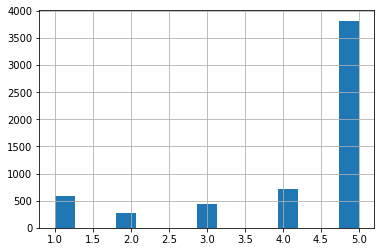

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
df1['Score'].hist(bins=15)
# RATING 5 HAS THE MOST NUMBER OF REVIEWS

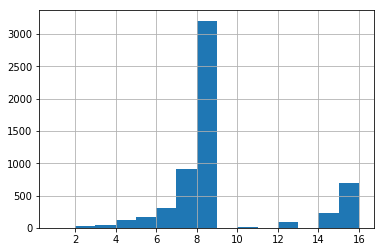

In [53]:
df1["Count"].hist(bins=15)  # select productID which has more than 2 reviews

In [60]:
#choose only products have over 2 reviews
df1.sort_values(by='Count',ascending=False)
df1.head()
df2 = df1[df1.Count >= 2]
df2.shape

(5810, 4)

In [89]:
#create new dataframe as combining all summary with same product Id
df4 = df2.groupby("ProductId", as_index=False).mean() #mean score
combine_summary = df2.groupby("ProductId")["Summary"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("combine_summary.csv") #solve .lower apply to list problem

In [63]:
df4.head()

,ProductId,Score,Count
0,B0000CCZYY,4.750000,8.0
1,B0000DID5Q,4.714286,7.0
2,B0000GHNT0,5.000000,8.0
3,B0000V8IOE,3.800000,5.0
4,B00014DAHU,4.125000,16.0


In [70]:
combine_summary.head()

,Summary
ProductId,
B0000CCZYY,[I ordered 5 different licorices to do a taste...
B0000DID5Q,"[This sauce is all kinds of hot, but not in th..."
B0000GHNT0,"[The title sums it up. I like spicy food, so I..."
B0000V8IOE,[I really look forward to Saturday mornings wh...
B00014DAHU,[Live this tea but found it half the price in ...


In [170]:
df3 = pd.read_csv("combine_summary.csv")
df3 = pd.merge(df3, df4, on="ProductId", how='inner')
df3 = df3[['ProductId','Summary','Score']]
df3.head()

,ProductId,Summary,Score
0,B0000CCZYY,"[""I ordered 5 different licorices to do a tast...",4.750000
1,B0000DID5Q,"[""This sauce is all kinds of hot, but not in t...",4.714286
2,B0000GHNT0,"['The title sums it up. I like spicy food, so ...",5.000000
3,B0000V8IOE,['I really look forward to Saturday mornings w...,3.800000
4,B00014DAHU,['Live this tea but found it half the price in...,4.125000


## 1.3 Text Clean process - Summary column

In [171]:
import nltk
import re

#function for tokenizing summary
cleanup_re = re.compile('[^a-z]+') # re.compile是将正则表达式编译成一个对象，加快速度，并重复使用
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip() #re.sub 字符串代替
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [172]:
df3["Summary_Clean"] = df3["Summary"].apply(cleanup)
df3.head()

,ProductId,Summary,Score,Summary_Clean
0,B0000CCZYY,"[""I ordered 5 different licorices to do a tast...",4.750000,i ordered different licorices to do a taste te...
1,B0000DID5Q,"[""This sauce is all kinds of hot, but not in t...",4.714286,this sauce is all kinds of hot but not in the ...
2,B0000GHNT0,"['The title sums it up. I like spicy food, so ...",5.000000,the title sums it up i like spicy food so i us...
3,B0000V8IOE,['I really look forward to Saturday mornings w...,3.800000,i really look forward to saturday mornings whe...
4,B00014DAHU,['Live this tea but found it half the price in...,4.125000,live this tea but found it half the price in t...


In [390]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from pandas import DataFrame 

docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english')
X = vect.fit_transform(docs) 

df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)

In [392]:
df5.head()

,add,amazon,bad,bag,bags,best,better,bit,bought,box,...,try,use,used,using,ve,want,water,way,wheat,years
0,0,1,0,0,0,3,1,0,0,1,...,0,0,0,1,2,0,0,0,1,0
1,1,0,2,0,0,0,0,1,2,0,...,1,7,0,3,0,1,3,3,0,0
2,1,0,0,0,0,2,0,0,1,0,...,0,2,1,1,1,0,0,0,0,0
3,0,1,1,7,0,2,7,1,6,1,...,3,2,1,0,1,1,1,1,0,1
4,0,0,0,2,0,0,0,0,0,0,...,0,4,2,0,0,0,0,2,0,0


# 2. KNN (Content-Based Recommender based on Review)

 ## 2.1 KNN classifier to find similar products

In [393]:
# First let's create a dataset called X
X = np.array(df5)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]
#len of train and test
lentrain = len(df5_train)
lentest = len(df5_test)

In [394]:
tsize #670
type(df5)
df5[0:670].shape

(670, 100)

In [395]:
from sklearn.neighbors import NearestNeighbors

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)  

In [396]:
 #find most related products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["ProductId"][lentrain + i] ," and this average Score is ",df3["Score"][lentrain + i])
    print ("The first similar product is ", df3["ProductId"][first_related_product] ," and this average Score is ",df3["Score"][first_related_product])
    print ("The second similar product is ", df3["ProductId"][second_related_product] ," and this average Score is ",df3["Score"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B004K69OMU  and this average Score is  5.0
The first similar product is  B00014G43W  and this average Score is  5.0
The second similar product is  B000EY5COG  and this average Score is  5.0
-----------------------------------------------------------
Based on product reviews, for  B004K6F1Z4  and this average Score is  4.75
The first similar product is  B000MXGMJI  and this average Score is  3.857142857142857
The second similar product is  B000MXENE4  and this average Score is  3.857142857142857
-----------------------------------------------------------
Based on product reviews, for  B004LKDDXQ  and this average Score is  5.0
The first similar product is  B0017U08SQ  and this average Score is  4.0
The second similar product is  B003DXGN70  and this average Score is  4.0
-----------------------------------------------------------
Based on product reviews, for  B004M3IXZU  and this average Score is  4.375
The first similar product is  B000FDOUXA  and this a

Based on product reviews, for  B008ATDIDE  and this average Score is  4.0
The first similar product is  B001E5E08S  and this average Score is  4.0
The second similar product is  B000LKYNIE  and this average Score is  4.625
-----------------------------------------------------------
Based on product reviews, for  B008BY7O9W  and this average Score is  4.8
The first similar product is  B000HQNBSU  and this average Score is  3.625
The second similar product is  B000E3C3QW  and this average Score is  5.0
-----------------------------------------------------------
Based on product reviews, for  B008CTBK7S  and this average Score is  5.0
The first similar product is  B000EJPDFY  and this average Score is  4.625
The second similar product is  B000R3P3S4  and this average Score is  4.5
-----------------------------------------------------------
Based on product reviews, for  B008EM51FA  and this average Score is  5.0
The first similar product is  B0014ATS08  and this average Score is  4.875
Th

In [398]:
df3.index[df3['ProductId'] == "B004N5UL3O"].tolist()

[677]

## 2.2 Predicting Review Score (KNN with Cosine similarity)

In [469]:
X = np.array(df5)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]
#len of train and test
lentrain = len(df5_train)
lentest = len(df5_test)

In [476]:
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

In [477]:
from sklearn import neighbors
#The similarity measure was cosine similarity and the number of the desired neighbors was ten.
n_neighbors = 17 #max
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',metric='cosine',algorithm='brute') #Cosine Distance=1−Cosine Similarity
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print (knnpreds_test)
#在某些情况下，更近的数据点对模型的贡献更大，可以通过参数 weights 来设置。默认情况下，weights=‘uniform’，
#所有邻居的权重是相同的。weights=‘distance’ ，权重正比于到查询点的距离的倒数。

[5 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 3 4 3 4 3 3 3 3 4 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4]


In [472]:
sf_csr=df5_train
result1 = knnclf.kneighbors(sf_csr)
result1[1]+1, result1[0] # lower cosine distance, more similiar

(array([[  1, 407, 175, ..., 389, 447, 477],
        [  2, 349,  33, ..., 593, 335,  16],
        [  3, 538,  33, ..., 477, 431,  16],
        ...,
        [668, 394, 341, ..., 425, 262, 614],
        [669, 251,  56, ..., 277, 590, 545],
        [670, 530, 560, ..., 614, 599, 161]]),
 array([[0.        , 0.25064941, 0.29416391, ..., 0.38637801, 0.38934209,
         0.39141938],
        [0.        , 0.18734351, 0.22305212, ..., 0.50459237, 0.50842623,
         0.51026511],
        [0.        , 0.17007793, 0.18181721, ..., 0.45454481, 0.4712992 ,
         0.47615916],
        ...,
        [0.        , 0.33175923, 0.34438371, ..., 0.41221244, 0.41421672,
         0.41944463],
        [0.        , 0.40035471, 0.42362912, ..., 0.5002891 , 0.50064977,
         0.50370692],
        [0.        , 0.36331799, 0.38605594, ..., 0.47357289, 0.47458936,
         0.47871396]]))

In [473]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#https://www.cnblogs.com/178mz/p/8558435.html   ： classification_report
print(classification_report(df5_test_target, knnpreds_test))
print (accuracy_score(df5_test_target, knnpreds_test)) #0.64

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.71      0.53      0.61        19
           4       0.62      0.93      0.74        40
           5       1.00      0.07      0.13        14

   micro avg       0.64      0.64      0.64        75
   macro avg       0.47      0.30      0.30        75
weighted avg       0.70      0.64      0.57        75

0.64


In [490]:
 df5_train_target.head()

0    4
1    4
2    5
3    3
4    4
Name: Score, dtype: int64

## 2.3 Word correltation based on cluster

In [240]:
df=df.rename(columns={"reviewer_rate": "Score", "reviewer_content": "Summary","link":"ProductId"})
cluster = df.groupby("Score")["Summary"].apply(list)
cluster.head()  #Series

Score
1    [I found cockroach inside the corn. I am never...
2    [Iüm always a bit sorry when I have to give a ...
3    [i bought it to help my eczema at the directio...
4    [I had been buying Dunkin Donuts ground coffee...
5    [The price is worth it if you don't have a nea...
Name: Summary, dtype: object

In [243]:
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv") #dataframe


In [246]:
cluster1["Summary_Clean"] = cluster1["Summary"].apply(cleanup)

In [252]:
cluster1.head()

,Score,Summary,Summary_Clean
0,1,['I found cockroach inside the corn. I am neve...,i found cockroach inside the corn i am never g...
1,2,['Iüm always a bit sorry when I have to give a...,i m always a bit sorry when i have to give a p...
2,3,['i bought it to help my eczema at the directi...,i bought it to help my eczema at the direction...
3,4,"[""I had been buying Dunkin Donuts ground coffe...",i had been buying dunkin donuts ground coffee ...
4,5,"[""The price is worth it if you don't have a ne...",the price is worth it if you don t have a near...


## 2.3.1 World Clouding for Each Score Group

In [254]:
conda install -c conda-forge wordcloud 

Solving environment: - 
  - anaconda::ca-certificates-2019.1.23-0
  - defaults::ca-certificates-2019.1.23done

## Package Plan ##

  environment location: /Users/effyhou/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    openssl-1.1.1b             |       h1de35cc_1         3.5 MB  conda-forge
    wordcloud-1.5.0            |py37h1de35cc_1000         165 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/osx-64::wordcloud-1.5.0-py37h1de35cc_1000

The following packages will be UPDATED:

  conda                  

In [255]:
 
import string
from wordcloud import WordCloud, STOPWORDS

In [256]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


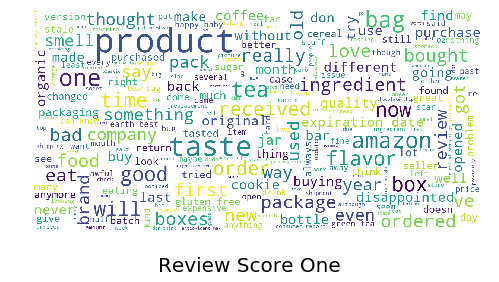

In [257]:
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review Score One")

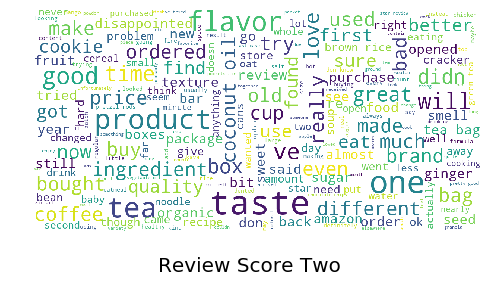

In [258]:
show_wordcloud(cluster1["Summary_Clean"][1] , title = "Review Score Two")

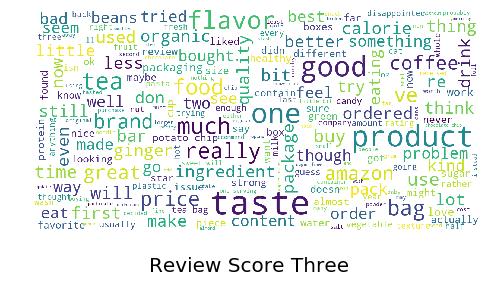

In [259]:
show_wordcloud(cluster1["Summary_Clean"][2], title = "Review Score Three")

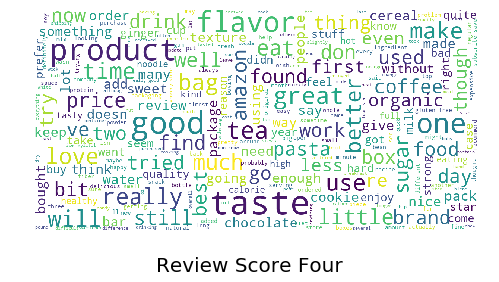

In [260]:
show_wordcloud(cluster1["Summary_Clean"][3], title = "Review Score Four")

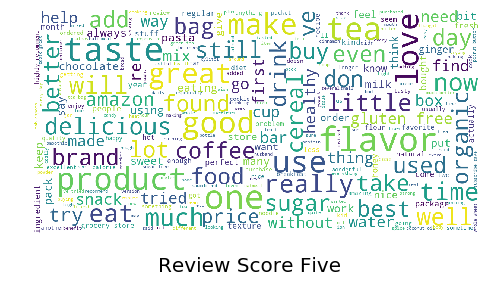

In [261]:
show_wordcloud(cluster1["Summary_Clean"][4], title = "Review Score Five")

In [270]:
conda install -c conda-forge scikit-surprise

Solving environment: done

## Package Plan ##

  environment location: /Users/effyhou/anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    openssl-1.1.1b             |       h1de35cc_1         3.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-0.13.2-py_0
  scikit-surprise    conda-forge/osx-64::scikit-surprise-1.0.6-py37h917ab60_1001

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge
  conda

In [274]:
conda install -c anaconda joblib 

Solving environment: done

## Package Plan ##

  environment location: /Users/effyhou/anaconda3

  added / updated specs:
    - joblib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    joblib-0.13.2              |           py37_0         367 KB  anaconda
    openssl-1.1.1b             |       h1de35cc_1         3.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                       conda-forge --> anaconda
  joblib             conda-forge/noarch::joblib-0.13.2-py_0 --> anaco

# 3. Cosine Similarity (Simple Recommender)

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(max_features = 100,stop_words='english')

#Replace NaN with an empty string
docs2 = df3["Summary_Clean"] 
docs2 = df3['Summary_Clean'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(docs2)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# You see that first 100 different words were used to describe the 745 movies in your dataset.


In [322]:
#Since you have used the TF-IDF vectorizer, calculating the dot product will directly give you the cosine similarity score. 
#Therefore, you will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.


# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)



In [326]:
#Construct a reverse map of indices and product titles
indices = pd.Series(df3.index, index=df3['ProductId']).drop_duplicates()
indices.head()

ProductId
B0000CCZYY    0
B0000DID5Q    1
B0000GHNT0    2
B0000V8IOE    3
B00014DAHU    4
dtype: int64

In [330]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores:The lambda function takes input x return x[1] which is the second element of x
     #key来制定我们根据那个字段对列表元素进行排序, 想对元素第二个字段排序，则 key=lambda x: x[1]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3['ProductId'].iloc[product_indices]

In [331]:
get_recommendations('B0000CCZYY')

406    B001E8HSAM
174    B000FELX2U
241    B000LKVIVE
327    B00139E46S
480    B001LG940E
481    B001LGGH40
99     B000E46GGO
101    B000E4ALHY
275    B000P54HVS
302    B000XSGMHO
Name: ProductId, dtype: object

# 4. Random Forest

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs3 = df3["Summary_Clean"] 
tfidf2 = TfidfVectorizer(max_features = 100, stop_words='english')
X = tfidf2.fit_transform(docs3) 

df6 = DataFrame(X.A, columns=vect.get_feature_names())
df6 = df6.astype(float)
df6.head()

,add,amazon,bad,bag,bags,best,better,bit,bought,box,...,try,use,used,using,ve,want,water,way,wheat,years
0,0.000000,0.061967,0.000000,0.000000,0.0,0.202661,0.065055,0.000000,0.000000,0.082167,...,0.000000,0.000000,0.000000,0.086288,0.112947,0.000000,0.000000,0.000000,0.119658,0.000000
1,0.034731,0.000000,0.069088,0.000000,0.0,0.000000,0.000000,0.030963,0.058551,0.000000,...,0.027779,0.189814,0.000000,0.107097,0.000000,0.033519,0.107496,0.096177,0.000000,0.000000
2,0.073340,0.000000,0.000000,0.000000,0.0,0.118033,0.000000,0.000000,0.061819,0.000000,...,0.000000,0.114519,0.059835,0.075383,0.049336,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.021616,0.029127,0.203888,0.0,0.047131,0.158855,0.026107,0.148107,0.028663,...,0.070267,0.045728,0.023892,0.000000,0.019700,0.028263,0.030213,0.027032,0.000000,0.027587
4,0.000000,0.000000,0.000000,0.091470,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.143604,0.075032,0.000000,0.000000,0.000000,0.000000,0.084890,0.000000,0.000000


In [407]:
# First let's create a dataset called X
X = np.array(df6)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(df6)))
df6_train = X[:tsize]
df6_test = X[tsize:]
#len of train and test
lentrain = len(df6_train)
lentest = len(df6_test)

In [412]:
df6_train_target = df3["Score"][:lentrain]
df6_test_target = df3["Score"][lentrain:lentrain+lentest]
df6_train_target = df5_train_target.astype(int)
df6_test_target = df5_test_target.astype(int)

In [420]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(df6_train,df6_train_target)

rfpreds_test=clf.predict(df6_test)
rfpreds_test

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


array([5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

In [419]:

print(classification_report(df6_test_target, rfpreds_test))
print (accuracy_score(df6_test_target, rfpreds_test)) #0.59

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      0.16      0.27        19
           4       0.56      1.00      0.72        40
           5       1.00      0.07      0.13        14

   micro avg       0.59      0.59      0.59        75
   macro avg       0.51      0.25      0.23        75
weighted avg       0.74      0.59      0.48        75

0.5866666666666667


## 4.1 Random Grid Search

In [421]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [478]:
from sklearn.ensemble import RandomForestClassifier
 

#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#but raising each n_iter or cv will increase the run time
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df6_train,df6_train_target)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [479]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [ ]:
#Evaluate Random Search
#To determine if random search yielded a better model,
#we compare the base model with the best random search model.

In [480]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(df6_train,df6_train_target)
base_accuracy = evaluate(base_model, df6_test,df6_test_target)
 

Model Performance
Average Error: 0.4800 degrees.
Accuracy = 83.04%.


In [481]:
 
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, df6_test,df6_test_target)
 
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
 

Model Performance
Average Error: 0.4267 degrees.
Accuracy = 84.98%.
Improvement of 2.33%.


In [482]:
KNN_accuracy = evaluate(knnclf, df6_test,df6_test_target)

Model Performance
Average Error: 0.4800 degrees.
Accuracy = 83.82%.


In [483]:
best_rf_predict = best_random .predict(df6_test)
print (accuracy_score(df6_test_target, best_rf_predict  )) #0.64

0.6133333333333333


# Simple Recommender (Weighted Score)

In [295]:
df4.head()

,ProductId,Score,Count
0,B0000CCZYY,4.750000,8.0
1,B0000DID5Q,4.714286,7.0
2,B0000GHNT0,5.000000,8.0
3,B0000V8IOE,3.800000,5.0
4,B00014DAHU,4.125000,16.0


In [296]:
#As a first step, let's calculate the value of C, the mean rating across all product:
# Calculate C
C = df1['Score'].mean()
print(C) #4.190574475404197   The average rating of a movie on IMDB is around 4.19, on a scale of 5.

4.190574475404197


In [314]:
# Function that computes the weighted rating of each product
def weighted_rating(x, m=m, C=C):
    v = x['Count']
    R = x['Score']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [315]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
df4['Weight_Score'] = df4.apply(weighted_rating, axis=1)

In [316]:
df4.head()

,ProductId,Score,Count,Weight_Score
0,B0000CCZYY,4.750000,8.0,4.377050
1,B0000DID5Q,4.714286,7.0,4.349965
2,B0000GHNT0,5.000000,8.0,4.460383
3,B0000V8IOE,3.800000,5.0,4.097581
4,B00014DAHU,4.125000,16.0,4.157787


In [317]:
#Sort product based on score calculated above
df4 = df4.sort_values('Weight_Score', ascending=False)

#Print the top 15 product
df4.head(15)

,ProductId,Score,Count,Weight_Score
174,B000FELX2U,5.000000,16.0,4.595287
642,B0041QIK1U,5.000000,16.0,4.595287
696,B0050J6Q2M,5.000000,16.0,4.595287
22,B0002YGSCI,5.000000,12.0,4.537471
204,B000GW257S,5.000000,12.0,4.537471
179,B000FK63SS,4.875000,16.0,4.532787
472,B001IZM7QQ,4.875000,16.0,4.532787
433,B001EO6866,4.875000,16.0,4.532787
701,B0054S0P9E,4.875000,16.0,4.532787
346,B0016BAB42,4.875000,16.0,4.532787
